In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
df = pd.read_csv("/content/countries.csv")
types = pd.read_csv("/content/types.csv")



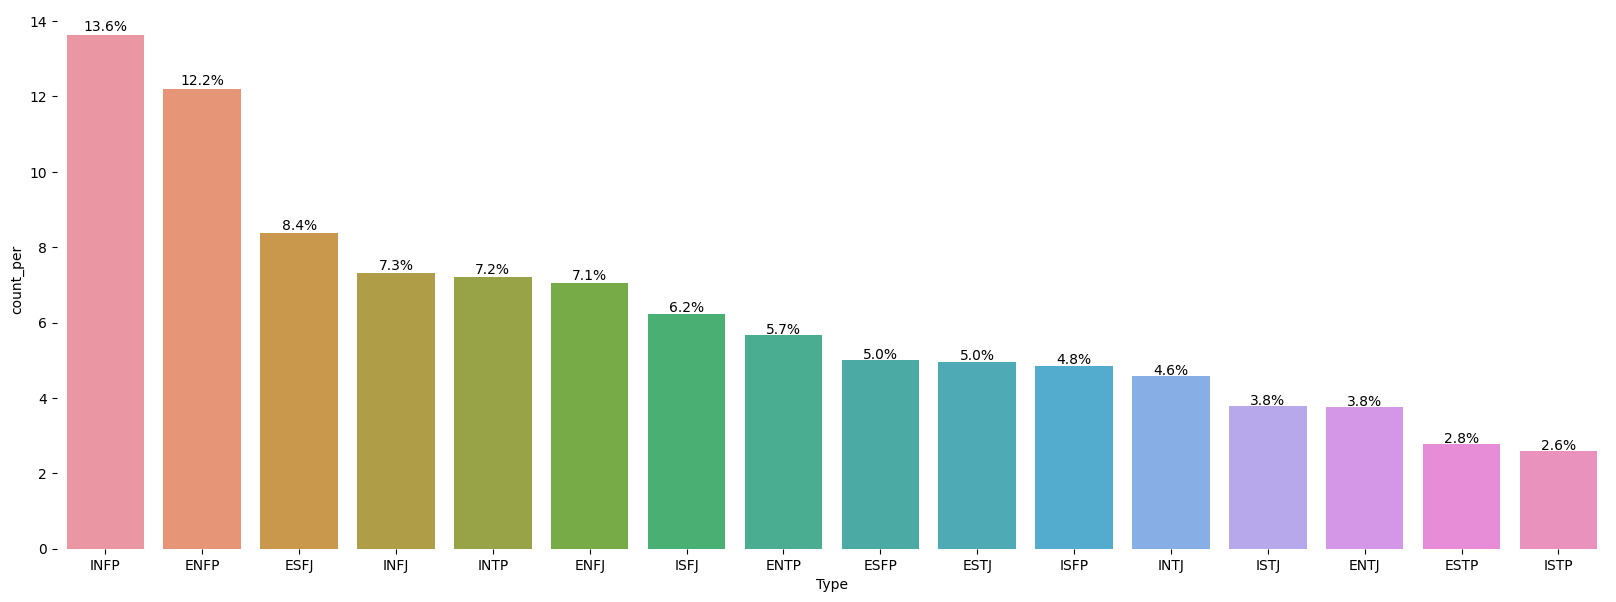

In [ ]:
a = types.Type
for i in range(len(a)):
    df[f'{a[i]}'] = df[f'{a[i]}-T'] + df[f'{a[i]}-A']

country = df["Country"]
df = df[a]
df["country"]=country

b=[]
for i in range(len(a)):
    b.append(df[a[i]].sum())

mbti = pd.DataFrame(a)
mbti["count_per"] = b
mbti["count_per"]= round(mbti["count_per"] * 100 /158,2)

mbti = mbti.sort_values(by="count_per",ascending=False)

plt.figure(figsize=(20,7))
ax = sns.barplot(data = mbti, x="Type", y= "count_per")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f%%"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.show()

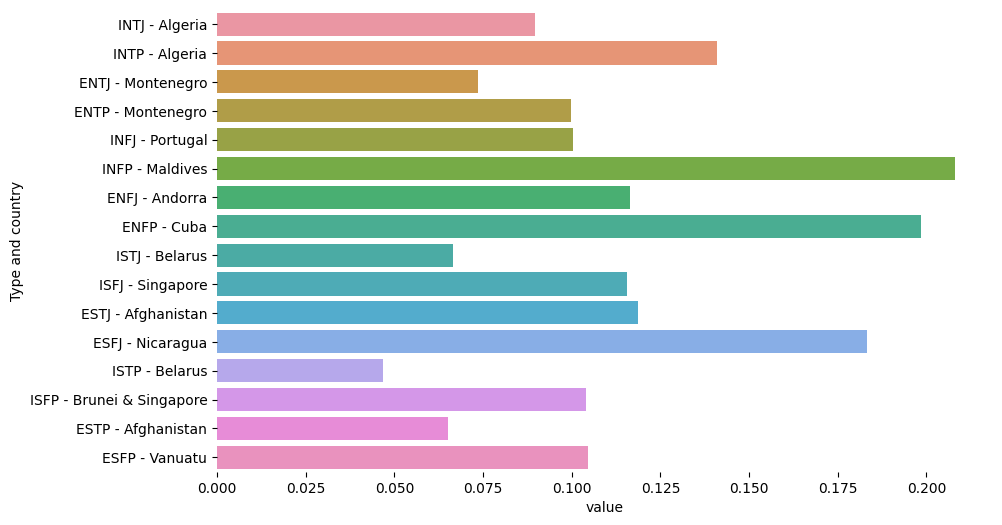

In [ ]:
c=[]
d=[]
for i in range(len(a)):
    c.append(str(str(df[df[a[i]] ==df[a[i]].max()].country).split(" ")[4]).split("\n")[0])
    d.append(df[a[i]].max())

b = pd.DataFrame(a)
b["country"] = c
b["value"] = d
b.loc[13,'country'] ='Brunei & Singapore'

b["Type and country"] = b['Type'] +" - "+ b['country']
plt.figure(figsize=(10,6))
plt.box(False)
sns.barplot(data=b, y="Type and country", x="value")
plt.show()

In [ ]:
e= types[['Type','Nickname']]
b.drop('Type and country',axis=1,inplace=True)
b["Nickname"] = e['Nickname']
b

,Type,country,value,Nickname
0,INTJ,Algeria,0.0896,Architect
1,INTP,Algeria,0.1410,Logician
2,ENTJ,Montenegro,0.0735,Commander
3,ENTP,Montenegro,0.0999,Debater
4,INFJ,Portugal,0.1004,Advocate
5,INFP,Maldives,0.2081,Mediator
6,ENFJ,Andorra,0.1163,Protagonist
7,ENFP,Cuba,0.1986,Campaigner
8,ISTJ,Belarus,0.0664,Logistician
9,ISFJ,Singapore,0.1155,Defender


In [ ]:
t = df.melt(id_vars=['country'])
t.value = t.value.round(2)

fig = px.line_polar(t, r="value", theta="variable", line_close=True,
                    animation_frame='country')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset from the downloaded CSV file
data = pd.read_csv('/content/countries.csv')

# Extract the features (X)
X = data[['ESTJ-A','ESFJ-A','INFP-T','ESFJ-T','ENFP-T','ENFP-A','ESTJ-T','ISFJ-T','ENFJ-A','ESTP-A','ISTJ-A','INTP-T','INFJ-T','ISFP-T','ENTJ-A','ESTP-T','ISTJ-T','ESFP-T','ENTP-A','ESFP-A','INTJ-T','ISFJ-A','INTP-A','ENTP-T','ISTP-T','ENTJ-T','ISTP-A','INFP-A','ENFJ-T','INTJ-A','ISFP-A','INFJ-A']]  # Replace 'feature1', 'feature2', ... with actual feature column names

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=3)  # Replace 3 with the desired number of clusters

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("Cluster Labels:")
print(labels)

# Get the cluster centroids
centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(centroids)


Cluster Labels:
[2 1 1 0 2 0 1 1 0 1 2 2 0 0 0 1 0 0 0 1 0 1 0 1 0 0 2 0 1 2 0 2 0 1 2 0 1
 2 0 2 0 0 0 0 0 1 2 0 0 1 0 1 1 2 1 2 0 0 0 2 0 1 0 0 0 1 0 0 1 2 0 1 2 2
 0 2 0 1 1 2 1 1 0 1 0 0 0 2 0 0 1 0 1 1 1 0 0 0 0 0 0 2 2 2 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 1 2 0 0 0 0 2 1 0 0 1 1 2 0 0 0 1 0 0 0 1 2 0 0 1 1 2 1 0
 0 2 0 1 2 0 0 1 2 2]

Cluster Centroids:
[[0.03001026 0.05467051 0.11486026 0.03317564 0.08145897 0.05075256
  0.01291026 0.04016795 0.03614615 0.01574103 0.01845256 0.03930641
  0.05500769 0.03655513 0.01818846 0.01012179 0.01526538 0.02845128
  0.02509487 0.02810641 0.02019615 0.02691538 0.02353846 0.02375
  0.01257821 0.01184103 0.01128974 0.03163077 0.03727436 0.01767436
  0.01840385 0.02065256]
 [0.03392917 0.03345625 0.11695625 0.0223375  0.07327083 0.04491458
  0.01441458 0.02852292 0.03048542 0.01779167 0.02044375 0.0630625
  0.05720417 0.02531042 0.0275625  0.01060208 0.01856875 0.01836667
  0.03744792 0.01784375 0.03495    0.01645625 0.03543542 0.03471458
  0.01464

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



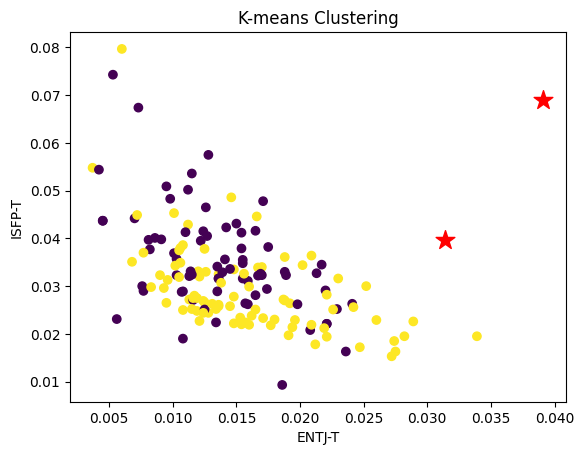

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset from the downloaded CSV file
data = pd.read_csv('/content/countries.csv')

# Extract the features (X)
X = data[['ESTJ-A','ESFJ-A','INFP-T','ESFJ-T','ENFP-T','ENFP-A','ESTJ-T','ISFJ-T','ENFJ-A','ESTP-A','ISTJ-A','INTP-T','INFJ-T','ISFP-T','ENTJ-A','ESTP-T','ISTJ-T','ESFP-T','ENTP-A','ESFP-A','INTJ-T','ISFJ-A','INTP-A','ENTP-T','ISTP-T','ENTJ-T','ISTP-A','INFP-A','ENFJ-T','INTJ-A','ISFP-A','INFJ-A']]  # Replace 'feature1', 'feature2', ... with actual feature column names

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=2)  # Replace 3 with the desired number of clusters

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X['ENTJ-T'], X['ISFP-T'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.xlabel('ENTJ-T')
plt.ylabel('ISFP-T')
plt.title('K-means Clustering')
plt.show()
